### Exploratory Data Analysis and Price prediction Using Regression on Used Car data

Here I'll use using a data set of the used car which includes the details of the car such as make, horsepower, body style, and the price they sold for to determine prices from similar used cars.

Also, I'll perform data analysis and visualization so that we can understand the data better for insights and better model evaluation.

To do all this I'm using python libraries such as Pandas for data manipulation and analysis, Numpy for high-level mathematical functions to operate on arrays, Matplotlib for creating static, animated, and interactive visualizations, Seaborn for drawing attractive and informative statistical graphics are used in this notebook to perform the necessary functions, and Sklearn for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction.

Regression analysis is done for one of two purposes: 
To predict the value of the dependent variable for individuals for whom some information concerning the explanatory variables is available, or to estimate the effect of some explanatory variable on the dependent variable.

To gain knowledge about visualization tools and machine learning using sklearn I've followed through Data analysis with python course by IBM to create this notebook.

#### First Lets import all the required libraries and the data set into the notebook

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [123]:
#changing matplotlib variable to improve the visuals of the plots
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Original Dataset

In [8]:
url = 'https: //archive.ics.uci.edu/ml/machine-learningdatabases/autos/imports-85.data'

In [9]:
df = pd.read_csv('../input/ucmachinelearning/imports-85.data', header = None)

#### The headers list was obtained from the source link provied above, we need to set them manually since the dataset doesn't come with any headers

In [10]:
headers = ['symboling','normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels',
           'engine-location', 'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type', 
            'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
            'stroke', 'compression-ratio','horsepower', 'peak-rpm', 
           'city-mpg', 'highway-mpg', 'price']

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [12]:
df.columns = headers

#### This is the Data we will be working with, same basic info is obtained from the dataset

In [13]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [16]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


#### Here we deal with missing data in the data set, since price is the main factor we'll be dealing with any rows not containing the value has to be dropped 

In [18]:
df['price'].replace('?', np.nan, inplace=True)

In [19]:
df.dropna(subset=['price'], axis=0, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### For other missing data we are replacing them with mean values or numpy.nan to avoid error in our visuals 

In [21]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [22]:
df['normalized-losses'].replace('?',np.nan , inplace=True)

In [23]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='ignore')

In [24]:
mean_normalised = df['normalized-losses'].mean()

In [25]:
mean_normalised

122.0

In [26]:
df['normalized-losses'].replace(np.nan, mean_normalised , inplace=True)

In [27]:
df['normalized-losses']

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 201, dtype: float64

#### Converting miles to km so that everyone can understand the data

In [28]:
df['city-mpg'] = 235/df['city-mpg']

In [29]:
df.rename(columns={'city-mpg':'L/100km'}, inplace=True)

In [31]:
df['price'] = df['price'].astype('int')

#### Normalsing length, width and height attributes using min-max method 

In [33]:
df['length'] = (df['length'] - df['length'].min())/(df['length'].max()-df['length'].min())

In [34]:
df['length']

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 201, dtype: float64

In [35]:
df['width'] = (df['width'] - df['width'].min())/(df['width'].max()-df['width'].min())

In [36]:
df['height'] = (df['height'] - df['height'].min())/(df['height'].max()-df['height'].min())

#### Binning Price into low, medium and high

In [38]:
df['price'].min()

5118

In [39]:
df['price'].max()

45400

In [40]:
bins =np.linspace(5000,45000,4)

In [41]:
bins.astype('int')

array([ 5000, 18333, 31666, 45000])

In [42]:
group_names = ['Low','Medium','High']

In [43]:
df['price-binned'] = pd.cut(df['price'],bins,labels=group_names, include_lowest = True)

#### Now we've done all the cleaning, analysis we've arrived with the dataframe on which we can perform Data Visualization on.

In [44]:
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,L/100km,highway-mpg,price,price-binned
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15.666667,19,32250,High
162,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,2bbl,3.19,3.03,9.0,70,4800,8.392857,34,9258,Low
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,4bbl,?,?,9.4,101,6000,13.823529,23,13645,Low
181,-1,122.0,toyota,gas,std,four,wagon,rwd,front,104.5,...,mpfi,3.27,3.35,9.2,156,5200,12.368421,24,15750,Low
101,0,128.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.43,3.27,9.0,152,5200,13.823529,22,13499,Low
159,0,91.0,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,idi,3.27,3.35,22.5,56,4500,6.184211,47,7788,Low
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123,4350,10.681818,25,31600,Medium
156,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,2bbl,3.19,3.03,9.0,70,4800,7.833333,37,6938,Low
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,mpfi,3.46,3.90,8.7,?,?,10.217391,31,9895,Low
38,0,106.0,honda,gas,std,two,hatchback,fwd,front,96.5,...,1bbl,3.15,3.58,9.0,86,5800,8.703704,33,9095,Low


#### Note
A histogram is a chart that groups numeric data into bins, displaying the bins as segmented columns. They're used to depict the distribution of a dataset: how often values fall into ranges.

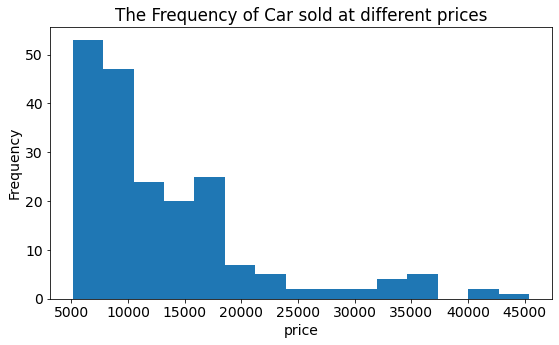

In [127]:
df['price'].plot(kind='hist', bins = 15);
plt.xlabel("price")
plt.title("The Frequency of Car sold at different prices");

#### Note
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

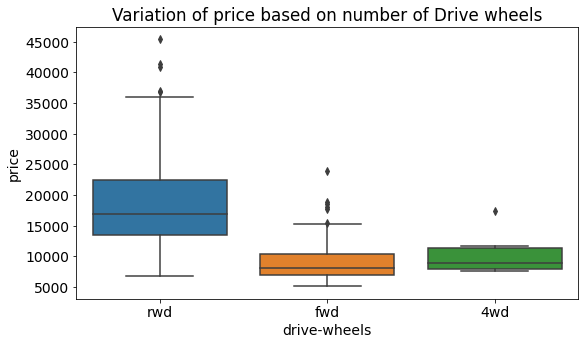

In [49]:
sns.boxplot(x='drive-wheels', y='price', data=df);
plt.title("Variation of price based on number of Drive wheels");

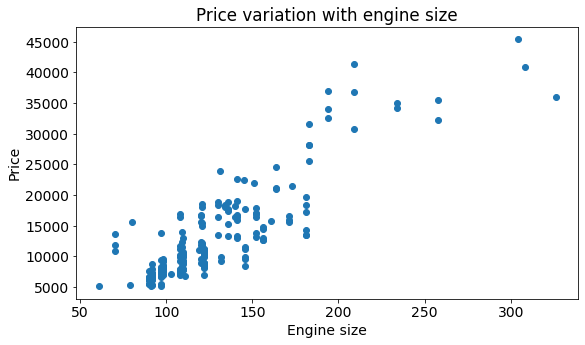

In [50]:
plt.scatter(df['engine-size'], df['price']);
plt.title('Price variation with engine size');
plt.xlabel("Engine size")
plt.ylabel("Price");

In [51]:
df_wheel_drive = df.groupby(['drive-wheels','body-style'], as_index=False)['price'].mean()

In [52]:
df_wheel_drive

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [53]:
df_wheel_drive = df_wheel_drive.pivot('drive-wheels','body-style','price')

In [54]:
df_wheel_drive

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


#### Note
Heatmaps shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader

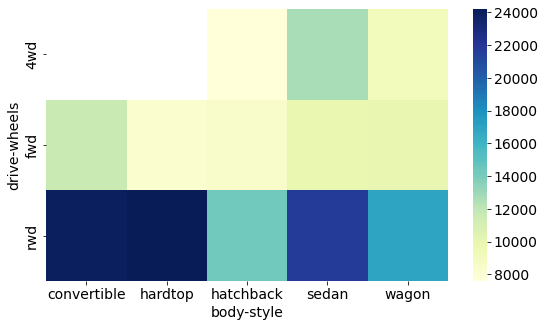

In [55]:
sns.heatmap(df_wheel_drive, cmap="YlGnBu");

In [56]:
df_make = df.groupby('make')['price'].mean()

In [57]:
df_make

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

In [58]:
df_make.sort_values(ascending=True , inplace=True)

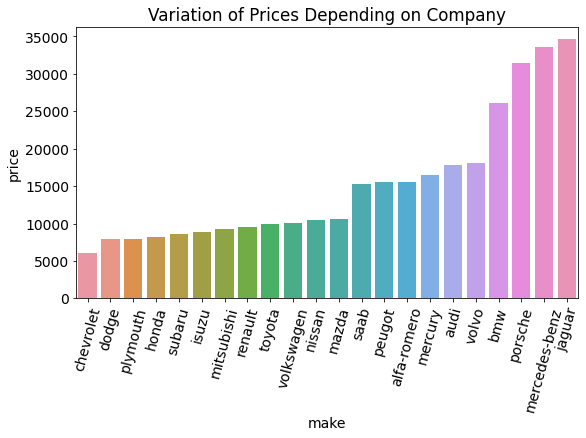

In [59]:
sns.barplot(x=df_make.index,y=df_make);
plt.xticks(rotation=75);
plt.title("Variation of Prices Depending on Company");

#### We can see the variation on prices for different car brands and here are the results for variance tests

#### Note
One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.

In [61]:
df_anova=df[['make','price']]
grouped_anova = df_anova.groupby('make')

In [63]:
anova_1 = sp.stats.f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('subaru')['price'])

In [64]:
anova_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

##### F statistic is less than 1 and p value is greater the 0.5 which means the result is confident and we can say that there is not much variance between honda and subaru car prices.

f test

In [65]:
anova_2 = sp.stats.f_oneway(grouped_anova.get_group('honda')['price'],grouped_anova.get_group('jaguar')['price'])

In [66]:
anova_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

##### F statistic is greater than 1 and p value is greater the 0.5 which means the result is confident and we can say that there is a lot variance between honda and jaguar car prices.

#### In this section we'll look for relations between attributes and how they influence the Price, I've selected only a few attributes that might mainly influence the price 

#### Note
Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. 

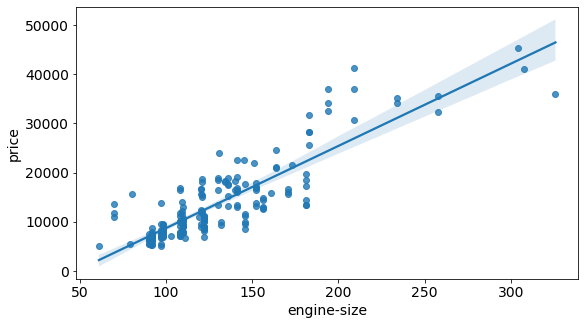

In [67]:
sns.regplot(x='engine-size',y='price',data=df);


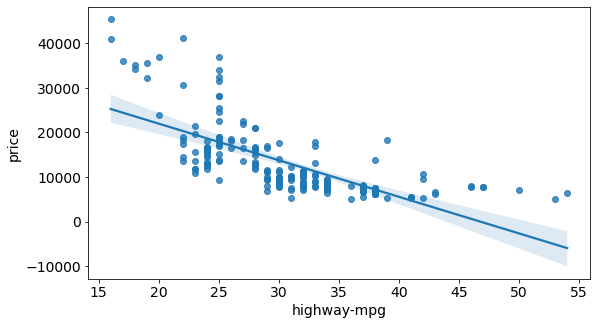

In [68]:
sns.regplot(x='highway-mpg', y='price',data=df);

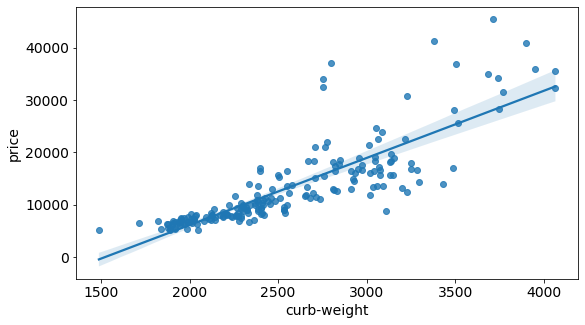

In [119]:
sns.regplot(x='curb-weight',y='price',data=df);

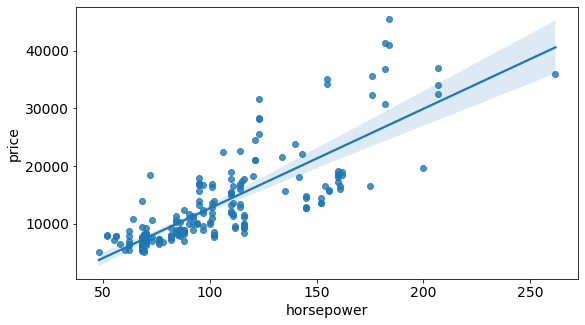

In [120]:
sns.regplot(x='horsepower',y='price',data=df);

In [69]:
df['peak-rpm'].replace('?', 0, inplace=True)

In [70]:
df['peak-rpm'] = df['peak-rpm'].astype('int') 

In [71]:
df['peak-rpm'].replace(0, np.nan, inplace=True)

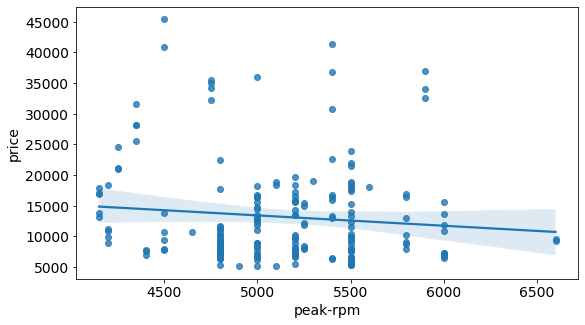

In [72]:
sns.regplot(x='peak-rpm', y='price',data=df);

In [73]:
df['stroke'].replace('?', 0, inplace=True)

In [74]:
df['stroke'] = df['stroke'].astype('float') 

In [75]:
df['stroke'].replace(0, np.nan, inplace=True)

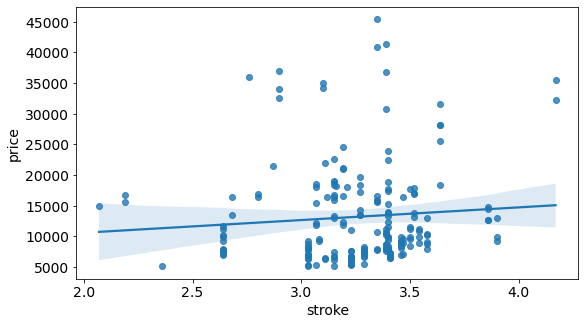

In [76]:
sns.regplot(x='stroke', y='price',data=df);

In [77]:
df['horsepower'].replace('?', 0, inplace=True)
df['horsepower'] = df['horsepower'].astype('int') 
df['horsepower'].replace(0, np.nan, inplace=True)


In [78]:
df['horsepower'].isna().sum()

2

In [79]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)

#### Note 

Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.

In [80]:
pearson_coef , p_value = sp.stats.pearsonr(df['horsepower'],df['price'])

In [81]:
pearson_coef

0.8105330821322061

horse power is positively correlated to price

In [82]:
p_value

1.189127827694731e-47

In [133]:
correlation_df = df.corr()

In [136]:
correlation_df[['price']]

,price
symboling,-0.082465
normalized-losses,0.134140
wheel-base,0.583797
length,0.693965
width,0.753871
height,0.134990
curb-weight,0.835090
engine-size,0.873887
stroke,0.093746
compression-ratio,0.069549


#### From the above Regression plots and correlation dataframe we can see that the most factors affecting the prices are Higway-mpg, Horsepower, Curb-weight, Engine size, length and width

#### Note
A residual plot shows the difference between the observed response and the fitted response values.

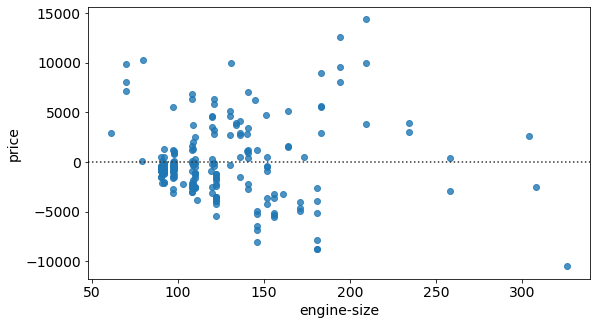

In [84]:
sns.residplot(x= df['engine-size'],y =df['price']);

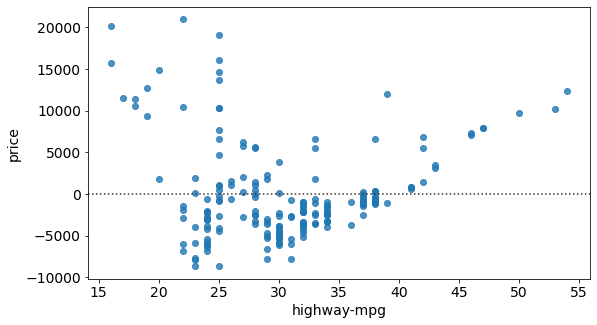

In [85]:
sns.residplot(x= df['highway-mpg'],y =df['price']);

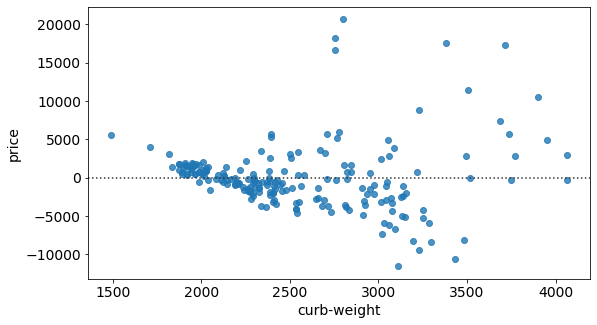

In [137]:
sns.residplot(x= df['curb-weight'],y =df['price']);

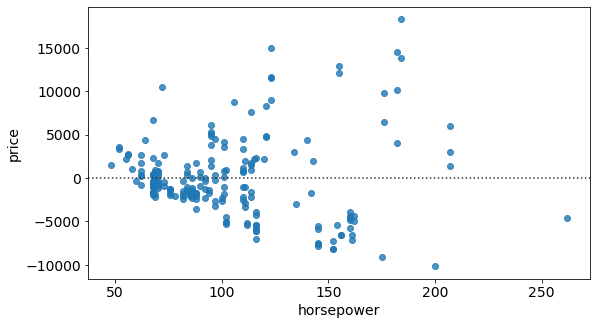

In [138]:
sns.residplot(x= df['horsepower'],y =df['price']);

#### From the residual plots we can see that while they seem to have curves in 1 or 2 of them they are random enough around the x-axis to fit a LinearRegression model

### Regression

#### We start building models for the data and checking the R square value to evaluate the model

In [88]:
lm = LinearRegression()

In [89]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [91]:
y = df['price']

In [93]:
lm.fit(z,y)

LinearRegression()

In [94]:
ex = lm.predict(z)

In [95]:
lm.score(z,y)

0.811469396425812

#### R square value of 0.811 for a multi-Linear Regression model, we maybe able to improve the results using a Polynomial regression model.

In [96]:
lm.fit(z,y)

LinearRegression()

In [97]:
ex

array([13741.39845627, 13741.39845627, 19088.01516843, 10657.90424705,
       15557.06262444, 13919.31226826, 15490.46493163, 16003.3040799 ,
       17628.33928255, 10757.28448941, 10757.28448941, 17860.77855061,
       18117.19812475, 19362.67585307, 27022.3362595 , 27721.66237079,
       28233.3989612 ,   692.55325105,  5693.76491579,  5856.94100842,
        5525.49652381,  5418.9437703 ,  8778.98554196,  5843.20161115,
        5945.76944081,  5945.76944081,  9072.70250871, 11904.09500729,
       18810.44277621,  4858.96186031,  5743.88910041,  4048.43471151,
        6165.94182551,  6240.53661071,  6492.29401078,  6557.56444783,
        9523.34633387,  9770.44155986,  9840.37417099, 10157.4020081 ,
       11212.57805806, 10463.95808505,  9508.15477689, 12656.21918307,
       34522.93303266, 34522.93303266, 44084.66613744,  5317.82059978,
        5613.06543205,  5636.37630243,  5822.86326544,  5846.17413581,
        7349.5259815 ,  7349.5259815 ,  7372.83685187, 10542.76041912,
      

In [98]:
lm.intercept_

-15700.5739790393

In [99]:
lm.coef_

array([53.27878556,  4.66217408, 82.22948394, 35.5175845 ])

#### Note
The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


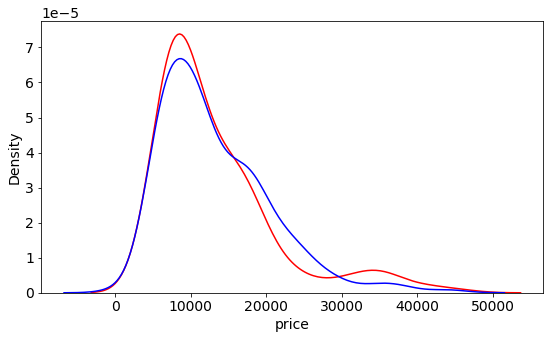

In [148]:
ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(ex,hist=False, color='b' , label='Fitted values' , ax=ax1);

#### From the distplot the predicted values almost align with the actual values

### Polynomial Regression

#### From trail and error I've found that degree 4 gives the best result 

In [102]:
pr = PolynomialFeatures(degree=4, include_bias=False)

In [103]:
x = pr.fit_transform(df[['horsepower','highway-mpg','curb-weight','engine-size']])

In [104]:
lm2 = LinearRegression()

In [105]:
lm2.fit(x,y)

LinearRegression()

In [106]:
lm2.score(x,y)

0.9558363898062026

#### From the R square value, the polynomial model is cearly better then the linear model

In [107]:
ex2 = lm2.predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


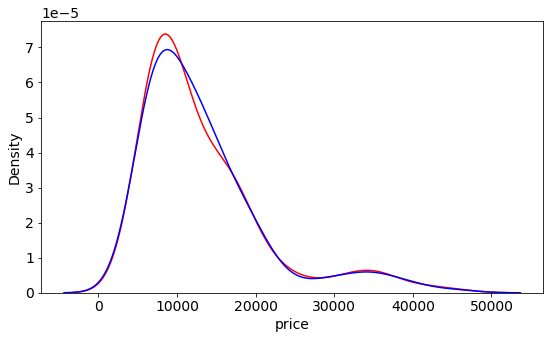

In [108]:
ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(ex2,hist=False, color='b' , label='Fitted values' , ax=ax1);

#### The predicted values also fit the actual values better

### Final Model

So far we've been evaluating the model based on the data used to train it, this is not a good determining factor as to see if the model is good, there for now we'll split the data into training data and testing data and perform Polynomial Regression on it.

In [149]:
pr2 = PolynomialFeatures(degree=2, include_bias=False) # degree 2 gave the best result

In [111]:
x_train,x_test,y_train,y_test= train_test_split(df[['horsepower','highway-mpg','curb-weight','engine-size']],y,test_size=0.3,random_state=0)

In [112]:
x_train_transformed = pr2.fit_transform(x_train)

In [113]:
lm3 = LinearRegression()

In [114]:
lm3.fit(x_train_transformed, y_train)

LinearRegression()

In [115]:
x_test_transformed = pr2.fit_transform(x_test)

In [116]:
lm3.score(x_test_transformed, y_test)

0.8603108098692865

#### While the R square value is lower than before this is a more reliable model since we are using testing data 

In [117]:
ex3 = lm3.predict(x_test_transformed)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


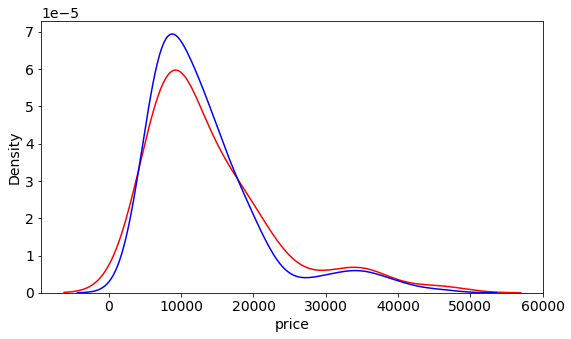

In [118]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(ex2,hist=False, color='b' , label='Fitted values' , ax=ax1);

### Conclusion

While I may have used Regression here, it may not be the best one suited for this data, and also since the amount of data we have to train the model is very low so we can't rely on the model to work perfectly in real-life.

On the other hand from our visualizations we can see what factors affect the prices and get a proper insight on the data.